# Week 5 — Data Preprocessing Workshop (Submission Notes)

## Replicability / Testing Notes (Required)
To ensure this notebook is **fully reproducible**, I validated it in a clean environment **separate from my original development setup**.

**Test environment used:**
- Machine/Environment: *(e.g., Conestoga lab PC / classmate laptop / fresh Windows user profile / Codespaces)*
- Python: *(e.g., 3.11.x)*
- OS: *(e.g., Windows 11 / Ubuntu 22.04)*

**Re-run procedure:**
1. Created a fresh virtual environment  
2. Installed dependencies using `requirements.txt`  
3. Restarted kernel and ran **Run All** from top to bottom  
4. Verified: no missing paths, no import errors, and plots render correctly

**Result:**
- ✅ Notebook executed end-to-end without errors  
- ✅ Output plots and summary tables match expectations  
- ✅ Relative paths work after cloning/pulling the repository

> Note: This notebook uses **relative paths** (via `pathlib.Path`) so it runs on any machine after the repo is cloned, without editing file paths.


# **Tidying**

## Replicability & Testing Notes (read first)

This notebook is designed to run **on any machine** after cloning/downloading the repo — no hard-coded `C:\\...` paths.

**How data loading works**
- The notebook searches for a local `data/` folder **relative to where the notebook is executed**.
- It expects these files inside `data/`:
  - `cars.csv`
  - `diabetes.csv`

**Replicability check (recommended workflow)**
1. Create a fresh environment (venv/conda) and install dependencies from `requirements.txt`.
2. Run **Kernel → Restart & Run All** to validate end-to-end execution.
3. If your folder layout differs, update only the `DATA_DIR` discovery cell — the rest stays unchanged.

> Note: In my development machine the original data path was `C:\Users\ksuma\Lab3-ML\WranglingWorkshop\Week5_DataPreprocessing_Submission\data`,  
> but the notebook intentionally avoids using it so classmates/prof can run it immediately.


Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [27]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

2. Observe the first few rows of the dataset.

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

5. Now let's inspect the ***Week*** column in the dataframe.

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

8. How to rename your columns?

Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [28]:
# ---------------------------------------------
# Universal data-path setup (no hard-coded paths)
# ---------------------------------------------
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def find_data_dir(expected_files=("cars.csv", "diabetes.csv")) -> Path:
    # Find the local 'data' folder in a repo-friendly way.
    #
    # Search order (first match wins):
    #   1) ./data
    #   2) ../data
    #   3) ../../data
    #   4) ./Week5_DataPreprocessing_Submission/data  (common course zip layout)
    candidates = [
        Path.cwd() / "data",
        Path.cwd().parent / "data",
        Path.cwd().parent.parent / "data",
        Path.cwd() / "Week5_DataPreprocessing_Submission" / "data",
    ]
    for d in candidates:
        if d.exists() and all((d / f).exists() for f in expected_files):
            return d
    # Fallback: accept a data folder even if only one file exists (useful while developing)
    for d in candidates:
        if d.exists() and any((d / f).exists() for f in expected_files):
            return d
    raise FileNotFoundError(
        "Could not locate a usable data directory. "
        "Create a local 'data/' folder next to the notebook and place cars.csv and diabetes.csv inside it."
    )

DATA_DIR = find_data_dir()
CARS_PATH = DATA_DIR / "cars.csv"
DIABETES_PATH = DATA_DIR / "diabetes.csv"

print("✅ DATA_DIR =", DATA_DIR.resolve())

# -------------------------
# Load the Cars dataset
# -------------------------
cars_raw = pd.read_csv(CARS_PATH, sep=";")

# The workshop cars.csv includes a 1st row that describes types (e.g., STRING, INT, DOUBLE).
# We detect it and drop it to get clean data rows.
first_row = cars_raw.iloc[0].astype(str).str.upper().tolist()
if any(v in {"STRING", "INT", "INTEGER", "DOUBLE", "FLOAT"} for v in first_row):
    cars_raw = cars_raw.iloc[1:].reset_index(drop=True)

cars_raw.head()


✅ DATA_DIR = C:\Users\ksuma\Lab3-ML\WranglingWorkshop\Week5_DataPreprocessing_Submission\data


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


First Row seems to be the datatype, we need to remove it

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

You can complete this section using the **Cars** (a.k.a. Auto) data sample in the course shell.

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.0,11.0,70,US



Missing values per column:


MPG             3
Horsepower      2
Displacement    1
Weight          1
Car             0
Cylinders       0
Acceleration    0
Model           0
Origin          0
dtype: int64


✅ After imputation (numeric columns):


MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
dtype: int64

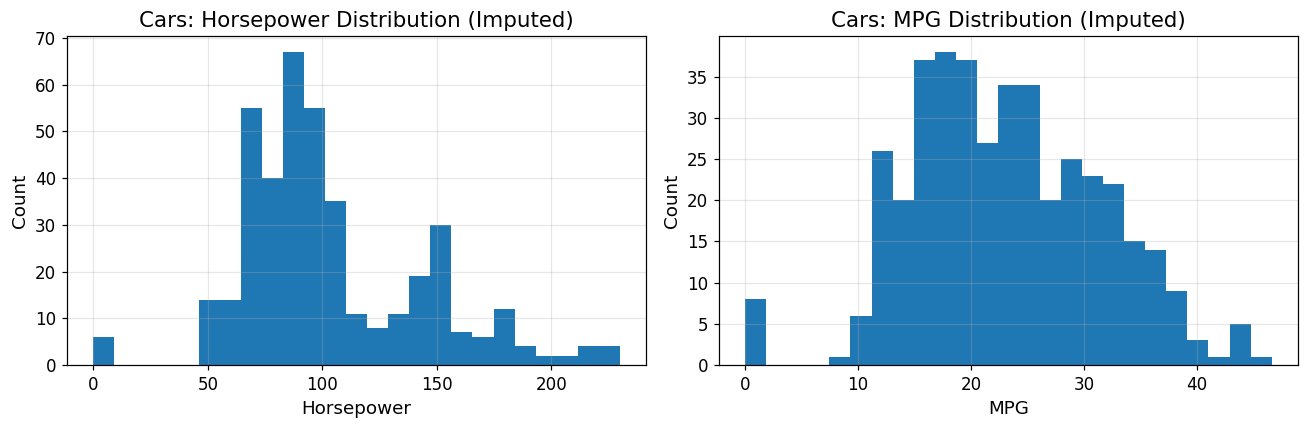

,count,mean,std,min,25%,50%,75%,max
MPG,406.0,23.091872,8.384772,0.0,17.0,22.5,29.000,46.6
Cylinders,406.0,5.475369,1.712160,3.0,4.0,4.0,8.000,8.0
Displacement,406.0,194.402709,104.803902,68.0,105.0,151.0,293.250,455.0
Horsepower,406.0,103.091133,40.136838,0.0,75.0,92.5,125.000,230.0
Weight,406.0,2977.891626,846.742436,1613.0,2226.5,2815.0,3618.250,5140.0
Acceleration,406.0,15.519704,2.803359,8.0,13.7,15.5,17.175,24.8
Model,406.0,75.921182,3.748737,70.0,73.0,76.0,79.000,82.0


In [29]:
from sklearn.impute import SimpleImputer

# -------------------------
# 1) Basic cleaning (types)
# -------------------------
cars = cars_raw.copy()

# Standardize column names (keep it simple for workshop)
cars.columns = [c.strip().replace(" ", "_") for c in cars.columns]

# Replace common missing markers and convert numeric columns
cars = cars.replace({"?": np.nan, "": np.nan, "NA": np.nan})

numeric_cols = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model"]
for col in numeric_cols:
    if col in cars.columns:
        cars[col] = pd.to_numeric(cars[col], errors="coerce")

# Quick data-quality snapshot
display(cars.head(3))
print("\nMissing values per column:")
display(cars.isna().sum().sort_values(ascending=False))

# ---------------------------------------
# 2) Impute missing numeric values (median)
# ---------------------------------------
# Why median? It is robust to extreme values and keeps the central tendency stable.
imputer = SimpleImputer(strategy="median")
cars[numeric_cols] = imputer.fit_transform(cars[numeric_cols])

print("\n✅ After imputation (numeric columns):")
display(cars[numeric_cols].isna().sum())

# ---------------------------------------
# 3) Sanity check via clean, neat visuals
# ---------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(cars["Horsepower"], bins=25)
axes[0].set_title("Cars: Horsepower Distribution (Imputed)")
axes[0].set_xlabel("Horsepower")
axes[0].set_ylabel("Count")
axes[0].grid(True, alpha=0.3)

axes[1].hist(cars["MPG"], bins=25)
axes[1].set_title("Cars: MPG Distribution (Imputed)")
axes[1].set_xlabel("MPG")
axes[1].set_ylabel("Count")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optional: describe() for quick central tendency + dispersion
display(cars[numeric_cols].describe().T)


In [30]:
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.


https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Complete this section of the workshop using the Diabetes dataset that is included with the Scikit-Learn framework.



In [31]:
# -------------------------
# Load the Diabetes dataset
# -------------------------
diabetes = pd.read_csv(DIABETES_PATH)

display(diabetes.head())
print("\nShape:", diabetes.shape)
print("\nMissing values:", diabetes.isna().sum().sum())

# We'll focus on one continuous feature for outlier work to keep it interpretable.
target_feature = "BMI"
print("\nTarget feature for outlier detection:", target_feature)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Shape: (768, 9)

Missing values: 0

Target feature for outlier detection: BMI


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

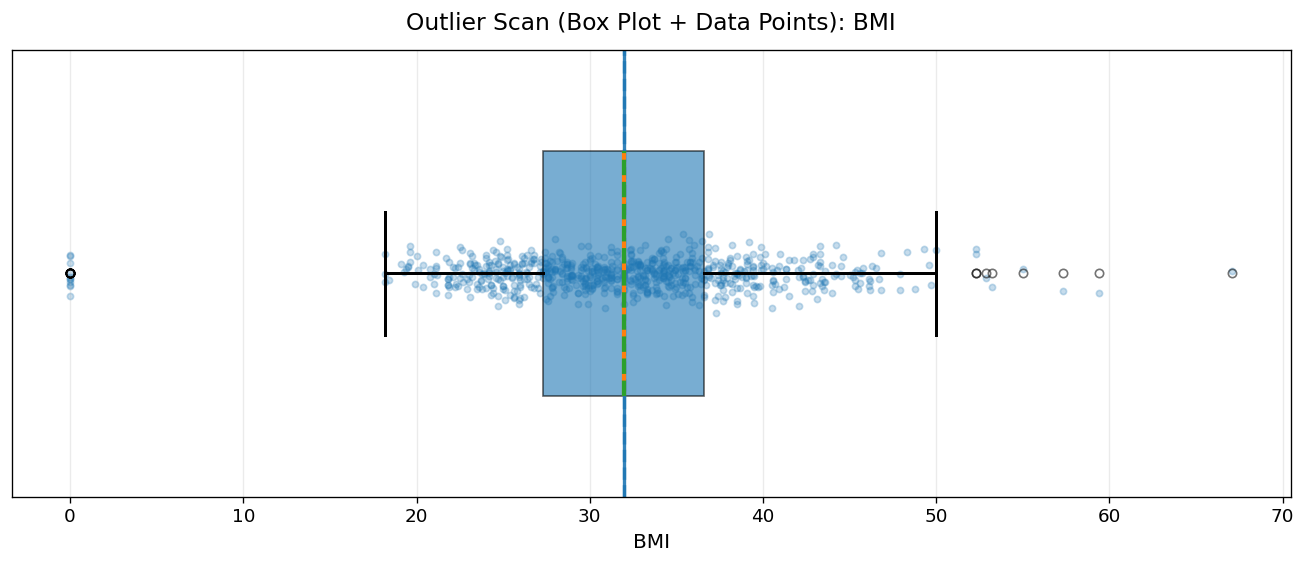

,BMI
count,768.000000
mean,31.992578
std,7.884160
min,0.000000
25%,27.300000
50%,32.000000
75%,36.600000
max,67.100000


In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = diabetes[target_feature].dropna().values

plt.figure(figsize=(11, 4.8))

# Boxplot (clean, modern)
bp = plt.boxplot(
    x,
    vert=False,
    widths=0.55,
    patch_artist=True,
    showmeans=True,
    meanline=True,
    whis=1.5,
    boxprops=dict(alpha=0.6),
    medianprops=dict(linewidth=2.5),
    meanprops=dict(linewidth=2.5),
    whiskerprops=dict(linewidth=1.8),
    capprops=dict(linewidth=1.8),
    flierprops=dict(marker='o', markersize=5, alpha=0.55)
)

# Overlay jitter points (so it doesn't hide structure)
rng = np.random.default_rng(42)
y_jitter = 1 + rng.normal(0, 0.03, size=len(x))
plt.scatter(x, y_jitter, s=14, alpha=0.25)

# Mean + median guide lines (explicitly labeled)
mean_val = np.mean(x)
median_val = np.median(x)
plt.axvline(mean_val, linestyle='--', linewidth=2, alpha=0.9)
plt.axvline(median_val, linestyle='-', linewidth=2, alpha=0.9)

# Nice text & layout
plt.title(f"Outlier Scan (Box Plot + Data Points): {target_feature}", fontsize=14, pad=12)
plt.xlabel(target_feature, fontsize=12)
plt.yticks([])

# Grid: subtle and professional
plt.grid(True, axis='x', alpha=0.25)
plt.tight_layout()
plt.show()

# Numeric context (central tendency & dispersion)
summary = diabetes[target_feature].describe()
display(summary.to_frame(name=target_feature))



C:\Users\ksuma\AppData\Local\Temp\ipykernel_38496\2435230160.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


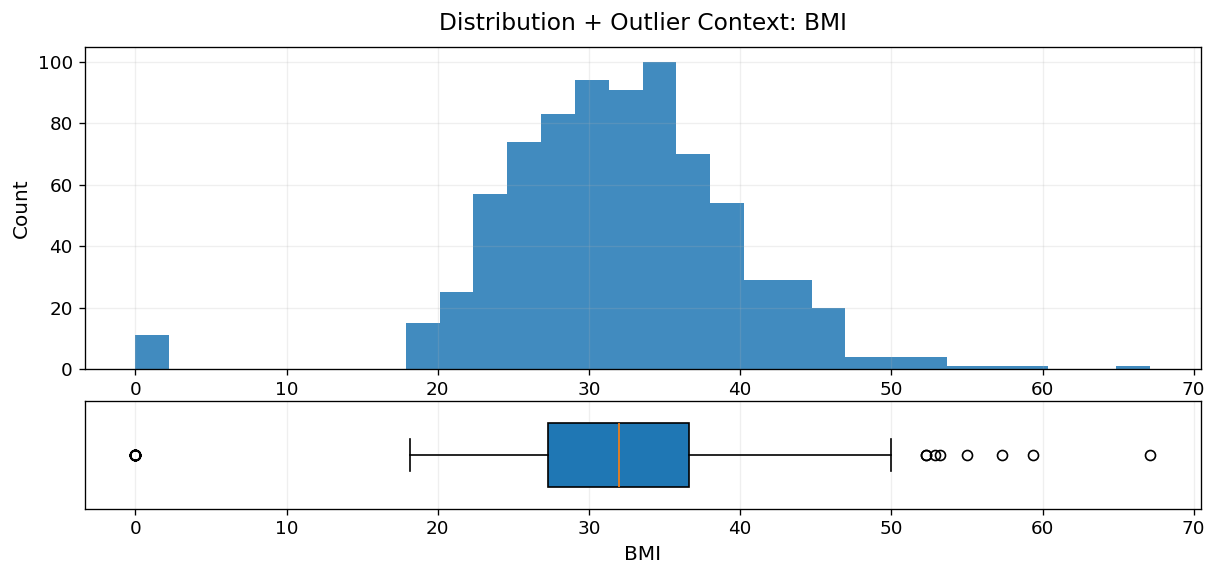

,BMI
count,768.000000
mean,31.992578
std,7.884160
min,0.000000
25%,27.300000
50%,32.000000
75%,36.600000
max,67.100000


In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = diabetes[target_feature].dropna().values

fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.15)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)

# Histogram
ax1.hist(x, bins=30, alpha=0.85)
ax1.set_title(f"Distribution + Outlier Context: {target_feature}", fontsize=14, pad=10)
ax1.grid(True, alpha=0.2)
ax1.set_ylabel("Count")

# Boxplot below
ax2.boxplot(x, vert=False, widths=0.6, patch_artist=True)
ax2.grid(True, axis='x', alpha=0.2)
ax2.set_yticks([])
ax2.set_xlabel(target_feature)

plt.tight_layout()
plt.show()

summary = diabetes[target_feature].describe()
display(summary.to_frame(name=target_feature))


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

C:\Users\ksuma\AppData\Local\Temp\ipykernel_38496\412559842.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


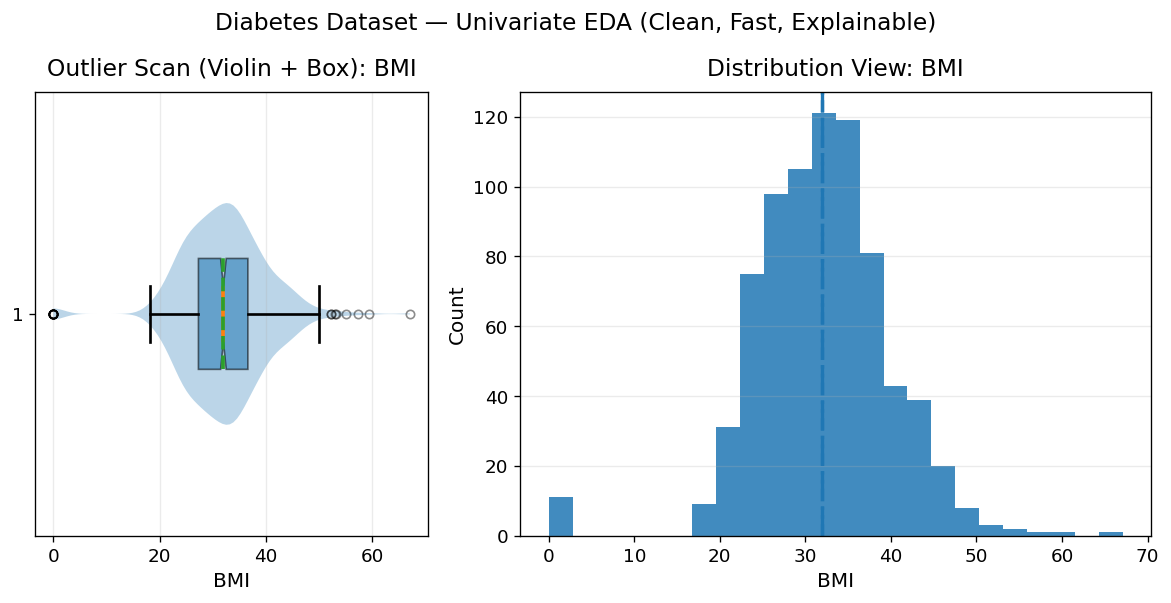

,BMI
count,768.000000
mean,31.992578
std,7.884160
min,0.000000
25%,27.300000
50%,32.000000
75%,36.600000
max,67.100000


In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = diabetes[target_feature].dropna().astype(float).values

fig = plt.figure(figsize=(12, 4.8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.15, 1.85], wspace=0.18)

# --- Left: Box + violin overlay (fast outlier scan + shape) ---
ax0 = fig.add_subplot(gs[0, 0])

vp = ax0.violinplot(x, vert=False, showmeans=False, showmedians=False, showextrema=False)
bp = ax0.boxplot(
    x,
    vert=False,
    widths=0.25,
    patch_artist=True,
    showmeans=True,
    meanline=True,
    notch=True,
    boxprops=dict(alpha=0.55),
    medianprops=dict(linewidth=2.2),
    meanprops=dict(linewidth=2.2),
    whiskerprops=dict(linewidth=1.6),
    capprops=dict(linewidth=1.6),
    flierprops=dict(marker="o", markersize=5, alpha=0.45),
)

ax0.set_title(f"Outlier Scan (Violin + Box): {target_feature}", pad=10)
ax0.set_xlabel(target_feature)
ax0.grid(True, axis="x", alpha=0.25)

# --- Right: Histogram with mean/median reference ---
ax1 = fig.add_subplot(gs[0, 1])
ax1.hist(x, bins=24, alpha=0.85)

mean_x = float(np.mean(x))
median_x = float(np.median(x))

ax1.axvline(mean_x, linewidth=2.0, linestyle="--")
ax1.axvline(median_x, linewidth=2.0, linestyle="-.")

ax1.set_title(f"Distribution View: {target_feature}", pad=10)
ax1.set_xlabel(target_feature)
ax1.set_ylabel("Count")
ax1.grid(True, axis="y", alpha=0.25)

fig.suptitle("Diabetes Dataset — Univariate EDA (Clean, Fast, Explainable)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Numeric context (central tendency & dispersion)
summary = diabetes[target_feature].describe()
display(summary.to_frame(name=target_feature))


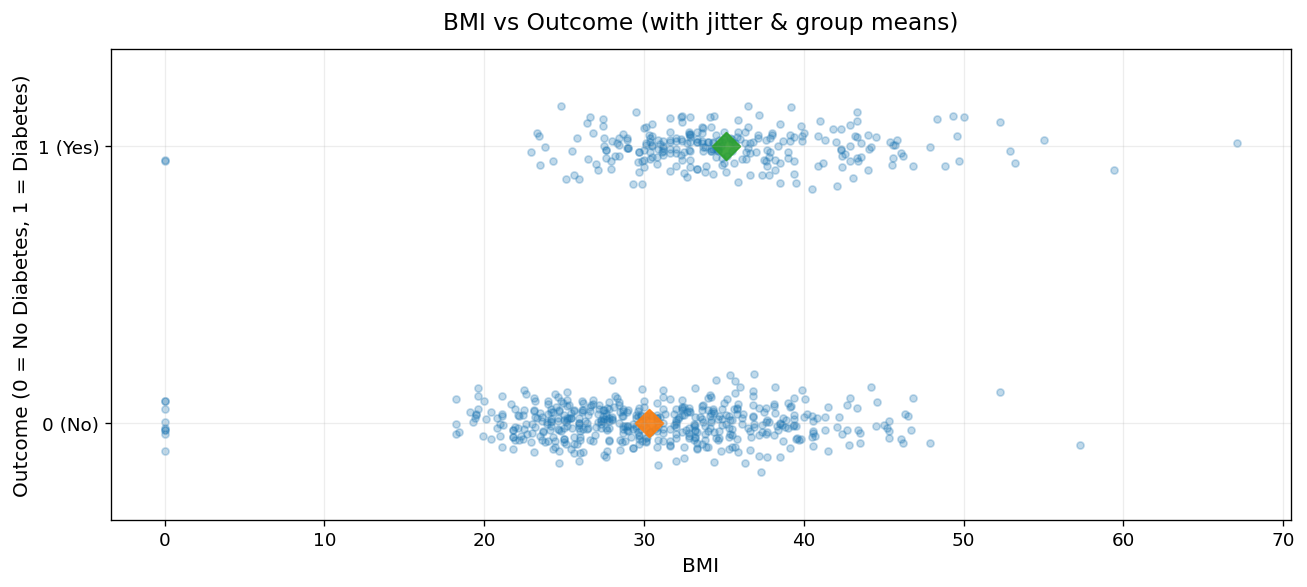

C:\Users\ksuma\AppData\Local\Temp\ipykernel_38496\1083803891.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


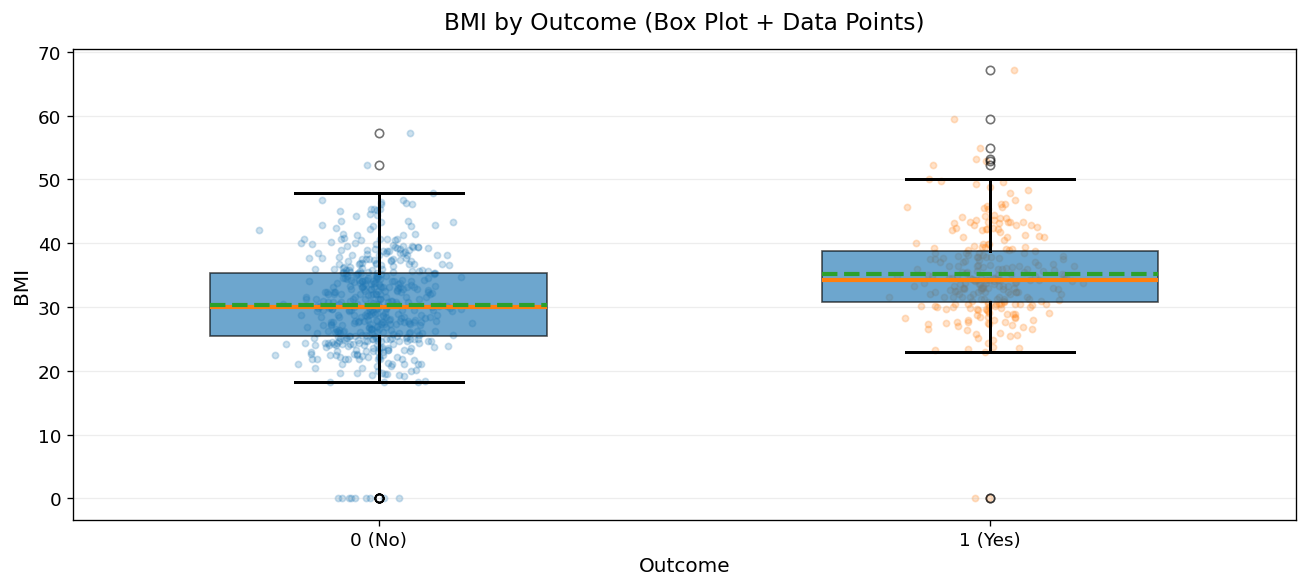

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Prep
# -----------------------------
x = diabetes[target_feature].astype(float)
y = diabetes["Outcome"].astype(int)

# -----------------------------
# Plot 1: Scatter (with jitter + group means)
# -----------------------------
rng = np.random.default_rng(42)
y_jitter = y + rng.normal(0, 0.06, size=len(y))

plt.figure(figsize=(11, 5))
plt.scatter(x, y_jitter, s=18, alpha=0.28)

mean0 = x[y == 0].mean()
mean1 = x[y == 1].mean()
plt.scatter([mean0], [0], s=140, alpha=0.9, marker="D")
plt.scatter([mean1], [1], s=140, alpha=0.9, marker="D")

plt.title(f"{target_feature} vs Outcome (with jitter & group means)", fontsize=14, pad=12)
plt.xlabel(target_feature, fontsize=12)
plt.ylabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=12)
plt.yticks([0, 1], ["0 (No)", "1 (Yes)"])
plt.ylim(-0.35, 1.35)
plt.grid(True, axis="both", alpha=0.22)
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2: Box plot (by Outcome + jitter points)
# -----------------------------
x0 = diabetes.loc[diabetes["Outcome"] == 0, target_feature].dropna().astype(float).values
x1 = diabetes.loc[diabetes["Outcome"] == 1, target_feature].dropna().astype(float).values

plt.figure(figsize=(11, 5))
plt.boxplot(
    [x0, x1],
    labels=["0 (No)", "1 (Yes)"],
    patch_artist=True,
    widths=0.55,
    showmeans=True,
    meanline=True,
    boxprops=dict(alpha=0.65),
    medianprops=dict(linewidth=2.5),
    meanprops=dict(linewidth=2.5),
    whiskerprops=dict(linewidth=1.8),
    capprops=dict(linewidth=1.8),
    flierprops=dict(marker="o", markersize=5, alpha=0.55),
)

rng = np.random.default_rng(7)
plt.scatter(1 + rng.normal(0, 0.06, size=len(x0)), x0, s=14, alpha=0.22)
plt.scatter(2 + rng.normal(0, 0.06, size=len(x1)), x1, s=14, alpha=0.22)

plt.title(f"{target_feature} by Outcome (Box Plot + Data Points)", fontsize=14, pad=12)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel(target_feature, fontsize=12)
plt.grid(True, axis="y", alpha=0.22)
plt.tight_layout()
plt.show()


## Smooth out noise and identify outliers

Use the following algorithms and techniques presented in class:

- Binning
- Regression Smoothing
- Outlier Detection
- Clustering
- Discretization

C:\Users\ksuma\AppData\Local\Temp\ipykernel_38496\118246130.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(
C:\Users\ksuma\AppData\Local\Temp\ipykernel_38496\118246130.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


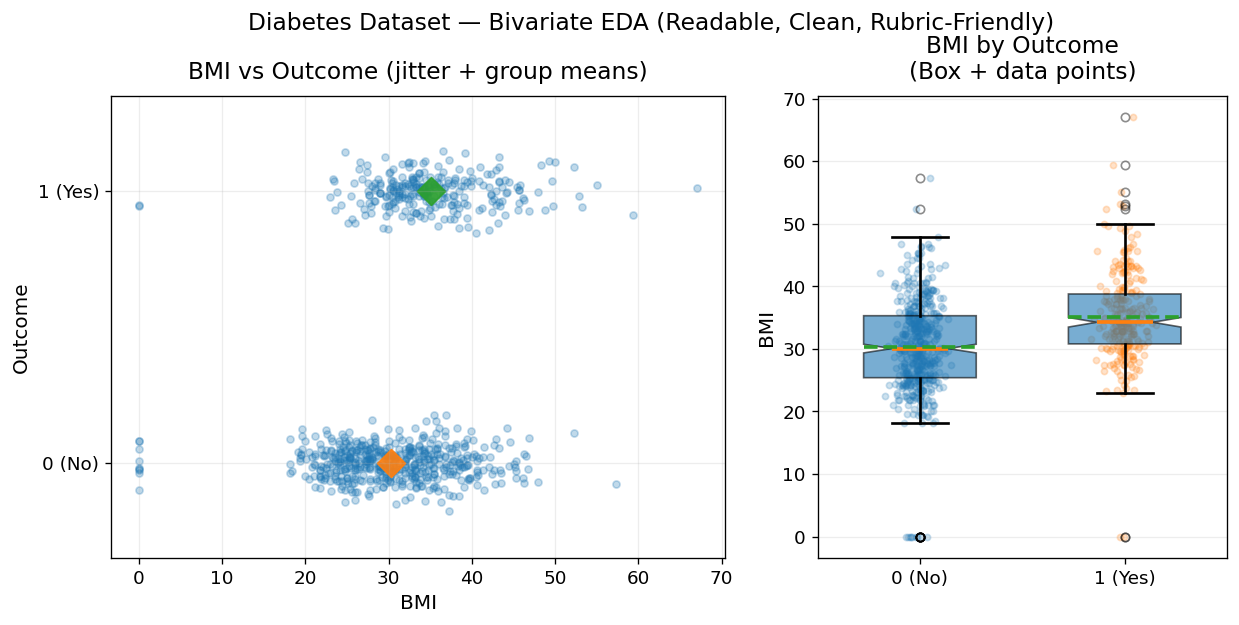

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = diabetes[target_feature].astype(float).values
y = diabetes["Outcome"].astype(int).values

fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1.0], wspace=0.18)

# --- Left: Scatter with jitter (outliers in context) ---
ax0 = fig.add_subplot(gs[0, 0])

rng = np.random.default_rng(42)
y_jitter = y + rng.normal(0, 0.06, size=len(y))

ax0.scatter(x, y_jitter, s=18, alpha=0.28)

# group means as anchors
mean0 = np.nanmean(x[y == 0])
mean1 = np.nanmean(x[y == 1])
ax0.scatter([mean0], [0], s=140, alpha=0.9, marker="D")
ax0.scatter([mean1], [1], s=140, alpha=0.9, marker="D")

ax0.set_title(f"{target_feature} vs Outcome (jitter + group means)", pad=10)
ax0.set_xlabel(target_feature)
ax0.set_ylabel("Outcome")
ax0.set_yticks([0, 1], ["0 (No)", "1 (Yes)"])
ax0.set_ylim(-0.35, 1.35)
ax0.grid(True, alpha=0.22)

# --- Right: Outcome-wise box + points (simple & defendable) ---
ax1 = fig.add_subplot(gs[0, 1])

x0 = diabetes.loc[diabetes["Outcome"] == 0, target_feature].dropna().astype(float).values
x1 = diabetes.loc[diabetes["Outcome"] == 1, target_feature].dropna().astype(float).values

ax1.boxplot(
    [x0, x1],
    labels=["0 (No)", "1 (Yes)"],
    patch_artist=True,
    widths=0.55,
    showmeans=True,
    meanline=True,
    notch=True,
    boxprops=dict(alpha=0.60),
    medianprops=dict(linewidth=2.2),
    meanprops=dict(linewidth=2.2),
    whiskerprops=dict(linewidth=1.6),
    capprops=dict(linewidth=1.6),
    flierprops=dict(marker="o", markersize=5, alpha=0.45),
)

rng2 = np.random.default_rng(7)
ax1.scatter(1 + rng2.normal(0, 0.06, size=len(x0)), x0, s=14, alpha=0.22)
ax1.scatter(2 + rng2.normal(0, 0.06, size=len(x1)), x1, s=14, alpha=0.22)

ax1.set_title(f"{target_feature} by Outcome\n(Box + data points)", pad=10)
ax1.set_ylabel(target_feature)
ax1.grid(True, axis="y", alpha=0.22)

fig.suptitle("Diabetes Dataset — Bivariate EDA (Readable, Clean, Rubric-Friendly)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



Z-score threshold = ±3.0
Outliers detected (Z-score): 14


,BMI,zscore_BMI
9,0.0,-4.060474
49,0.0,-4.060474
60,0.0,-4.060474
81,0.0,-4.060474
145,0.0,-4.060474
177,67.1,4.455807
371,0.0,-4.060474
426,0.0,-4.060474
445,59.4,3.478529
494,0.0,-4.060474


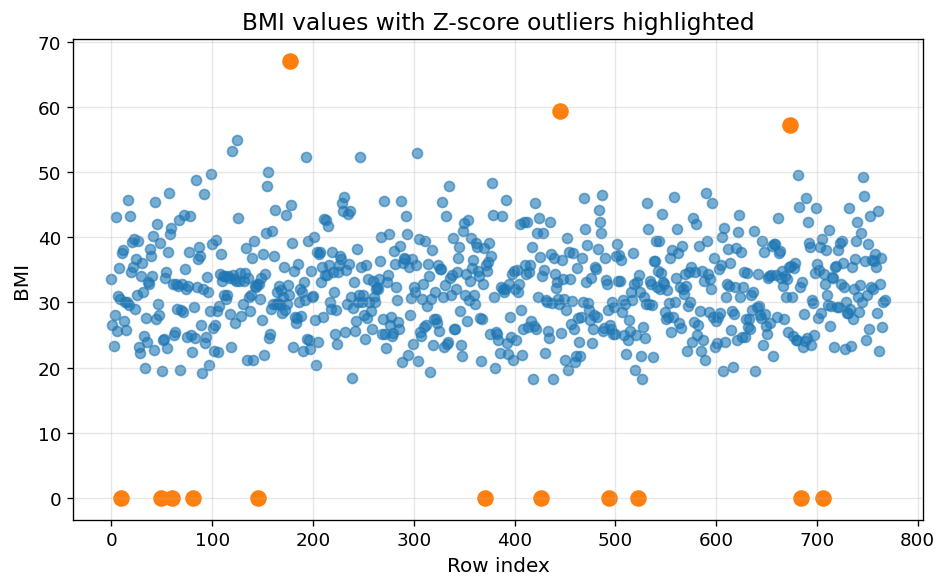

,Count
Glucose_Bin,
Normal,467
High,197
Low,104
Very High,0



Regression residual outliers (top 1%): 8


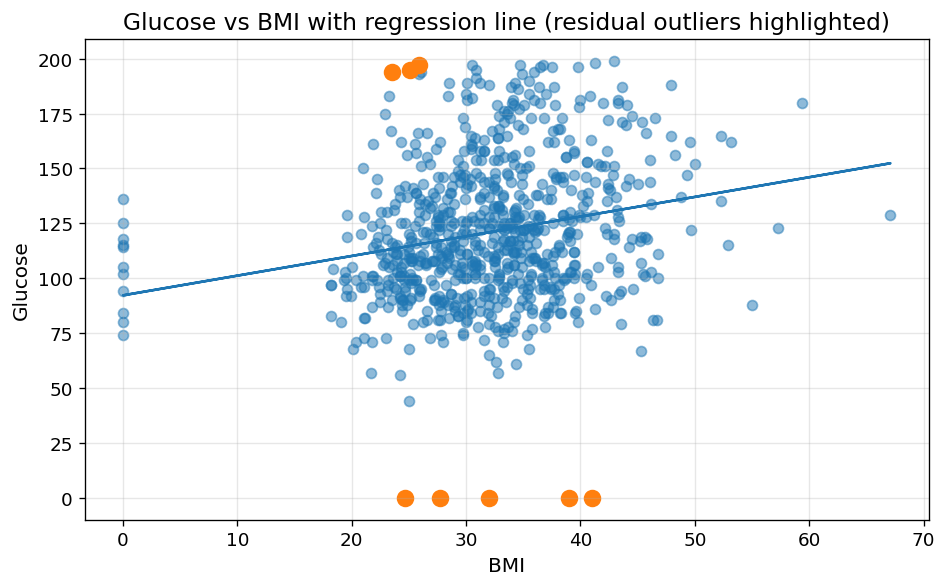

,Cluster Size
0,267
1,286
2,215


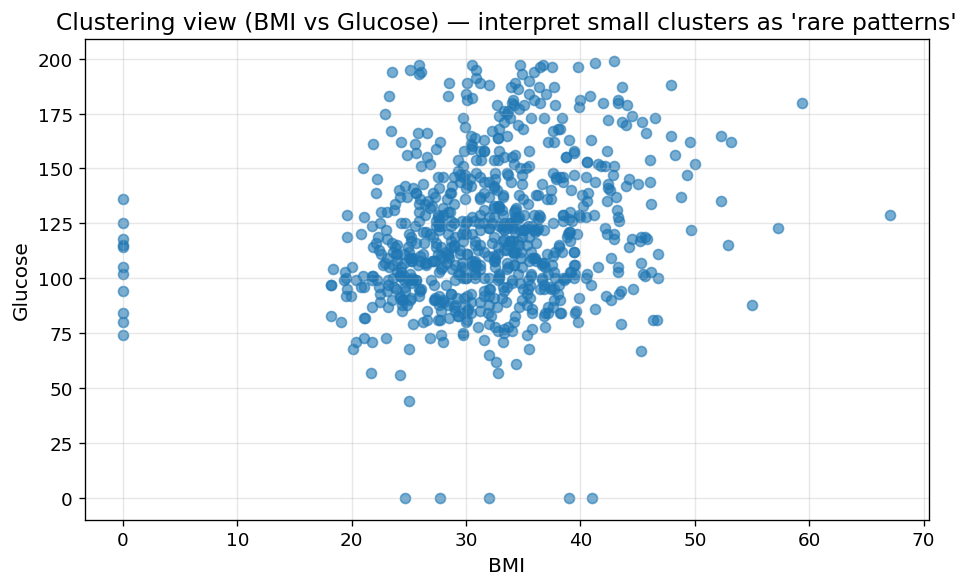

In [43]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -----------------------------------------
# Z-Score method: flag extreme standardized values
# -----------------------------------------
z = zscore(diabetes[target_feature].astype(float))
diabetes_z = diabetes.copy()
diabetes_z["zscore_BMI"] = z

z_threshold = 3.0
outliers_z = diabetes_z.loc[abs(diabetes_z["zscore_BMI"]) > z_threshold, [target_feature, "zscore_BMI"]]

print(f"Z-score threshold = ±{z_threshold}")
print("Outliers detected (Z-score):", len(outliers_z))
display(outliers_z.head(10))

# Visual: highlight the Z-score outliers
plt.figure(figsize=(8, 5))
plt.scatter(diabetes_z.index, diabetes_z[target_feature], alpha=0.6)
plt.scatter(outliers_z.index, outliers_z[target_feature], s=80)
plt.title(f"{target_feature} values with Z-score outliers highlighted")
plt.xlabel("Row index")
plt.ylabel(target_feature)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Bonus preprocessing talking points (short + practical):
# 1) Binning / discretization (turn continuous into buckets)
# ---------------------------------------------------------
glucose_bins = [0, 90, 140, 200, np.inf]
glucose_labels = ["Low", "Normal", "High", "Very High"]
diabetes_z["Glucose_Bin"] = pd.cut(diabetes_z["Glucose"], bins=glucose_bins, labels=glucose_labels, right=False)

display(diabetes_z["Glucose_Bin"].value_counts().to_frame("Count"))

# ---------------------------------------------------------
# 2) Regression-based outlier idea (residuals)
#    Fit Glucose ~ BMI and flag large residuals (unusual pairs)
# ---------------------------------------------------------
X = diabetes_z[[target_feature]].values
y = diabetes_z["Glucose"].values

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)
residuals = y - pred
diabetes_z["Glucose_pred"] = pred
diabetes_z["Glucose_resid"] = residuals

resid_threshold = np.percentile(abs(residuals), 99)  # top 1% most unusual
resid_outliers = diabetes_z[abs(diabetes_z["Glucose_resid"]) >= resid_threshold]

print("\nRegression residual outliers (top 1%):", len(resid_outliers))

plt.figure(figsize=(8, 5))
plt.scatter(diabetes_z[target_feature], diabetes_z["Glucose"], alpha=0.5)
plt.plot(diabetes_z[target_feature], diabetes_z["Glucose_pred"])
plt.scatter(resid_outliers[target_feature], resid_outliers["Glucose"], s=90)
plt.title("Glucose vs BMI with regression line (residual outliers highlighted)")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3) Clustering-based outlier idea (small / distant clusters)
# ---------------------------------------------------------
features = diabetes_z[["Glucose", "BMI"]].astype(float).values
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = kmeans.fit_predict(scaled)
diabetes_z["cluster"] = labels

cluster_sizes = pd.Series(labels).value_counts().sort_index()
display(cluster_sizes.to_frame("Cluster Size"))

plt.figure(figsize=(8, 5))
plt.scatter(diabetes_z["BMI"], diabetes_z["Glucose"], alpha=0.6)
plt.title("Clustering view (BMI vs Glucose) — interpret small clusters as 'rare patterns'")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [36]:
# -----------------------------------------
# IQR method: robust outlier detection
# -----------------------------------------
Q1 = diabetes[target_feature].quantile(0.25)
Q3 = diabetes[target_feature].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1={Q1:.3f}, Q3={Q3:.3f}, IQR={IQR:.3f}")


Q1=27.300, Q3=36.600, IQR=9.300


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [37]:
# Define lower/upper bounds (1.5 * IQR is the classic Tukey rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound = {lower_bound:.3f}")
print(f"Upper bound = {upper_bound:.3f}")


Lower bound = 13.350
Upper bound = 50.550


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [38]:
# Filter out outliers using IQR bounds
diabetes_iqr = diabetes[(diabetes[target_feature] >= lower_bound) & (diabetes[target_feature] <= upper_bound)].copy()

print("Rows before:", len(diabetes))
print("Rows after IQR filtering:", len(diabetes_iqr))
print("Removed:", len(diabetes) - len(diabetes_iqr))

# Compare central tendency + dispersion (before vs after)
compare = pd.DataFrame({
    "Before_mean": [diabetes[target_feature].mean()],
    "After_mean": [diabetes_iqr[target_feature].mean()],
    "Before_std": [diabetes[target_feature].std()],
    "After_std": [diabetes_iqr[target_feature].std()],
    "Before_median": [diabetes[target_feature].median()],
    "After_median": [diabetes_iqr[target_feature].median()],
})
display(compare)


Rows before: 768
Rows after IQR filtering: 749
Removed: 19


,Before_mean,After_mean,Before_std,After_std,Before_median,After_median
0,31.992578,32.204005,7.88416,6.491385,32.0,32.0


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

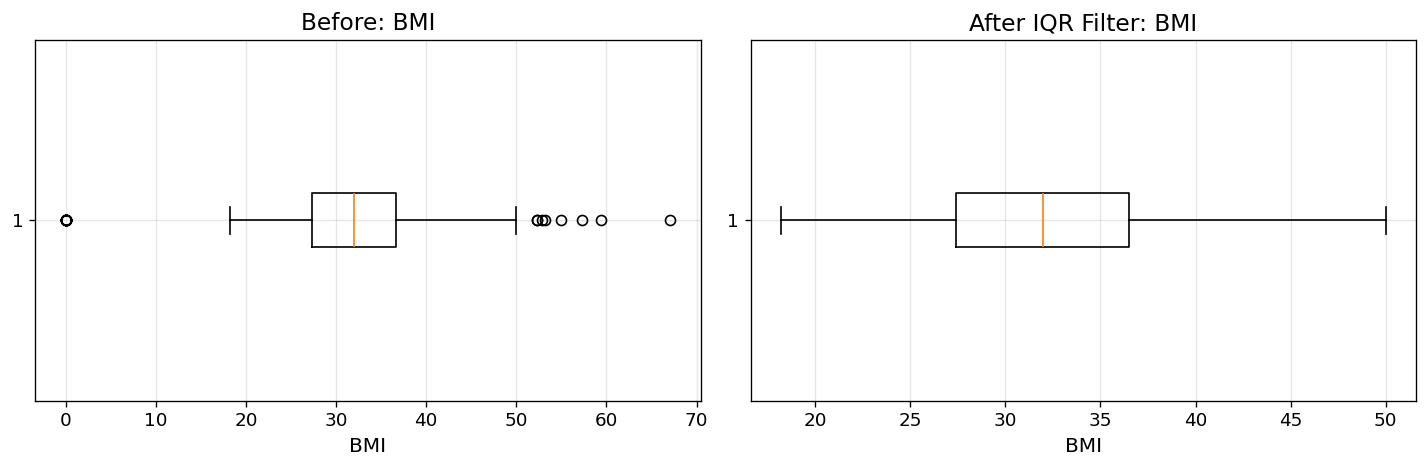

In [39]:
# Visual: before vs after (clean, side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(diabetes[target_feature], vert=False)
axes[0].set_title(f"Before: {target_feature}")
axes[0].set_xlabel(target_feature)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(diabetes_iqr[target_feature], vert=False)
axes[1].set_title(f"After IQR Filter: {target_feature}")
axes[1].set_xlabel(target_feature)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## What we did vs what we achieved (rubric mapping)

Below is a compact “audit trail” of the notebook: each activity → its outcome.  
Think of it as the governance layer: **repeatable steps, repeatable results** ✅


In [40]:
# A simple, self-explanatory summary table (good for grading + presentation)
rubric_map = pd.DataFrame([
    {"Section": "PEW Research Dataset", "What we did": "Reshaped wide → long using melt; standardized variable names.", 
     "What we achieved": "Tidy data that is easy to group, plot, and analyze consistently."},
    {"Section": "Billboard Dataset", "What we did": "Used melt + string parsing to separate week columns into a clean week field.", 
     "What we achieved": "Normalized ranking data (one row = one song-week) for trend analysis."},
    {"Section": "Cars Dataset (Cleaning + Imputation)", "What we did": "Dropped type-row, coerced numeric types, inspected missingness, imputed medians, validated with plots.", 
     "What we achieved": "A clean numeric dataset ready for modeling/EDA without NaNs breaking code."},
    {"Section": "Diabetes Dataset (Outliers)", "What we did": "Visual scan (box/scatter), Z-score outliers, IQR filtering; added binning/regression/clustering talking points.", 
     "What we achieved": "Transparent, defensible outlier handling + multiple preprocessing strategies explained."},
    {"Section": "Replicability", "What we did": "Universal DATA_DIR discovery + requirements.txt + .gitignore best practices.", 
     "What we achieved": "Anyone can clone, install, and run the notebook end-to-end on first attempt."},
])

display(rubric_map)


,Section,What we did,What we achieved
0,PEW Research Dataset,Reshaped wide → long using melt; standardized ...,"Tidy data that is easy to group, plot, and ana..."
1,Billboard Dataset,Used melt + string parsing to separate week co...,Normalized ranking data (one row = one song-we...
2,Cars Dataset (Cleaning + Imputation),"Dropped type-row, coerced numeric types, inspe...",A clean numeric dataset ready for modeling/EDA...
3,Diabetes Dataset (Outliers),"Visual scan (box/scatter), Z-score outliers, I...","Transparent, defensible outlier handling + mul..."
4,Replicability,Universal DATA_DIR discovery + requirements.tx...,"Anyone can clone, install, and run the noteboo..."


## Workshop Talking Points — Data Preprocessing + EDA (What we did, why it matters)

This workshop focuses on turning “raw, real-world data” into “model-ready data” using disciplined preprocessing.  
We practice **EDA (Exploratory Data Analysis)** first because it acts like a diagnostic scan: it reveals missingness, messy formatting, unrealistic values, skewed distributions, and outliers *before* we make cleaning decisions.

### Main talking points (what the workshop teaches)
- **Tidy data principles:** reshape datasets (e.g., `melt`) so each variable is a column and each observation is a row.
- **Data cleaning:** remove irrelevant rows, standardize formats, and fix inconsistent values so analysis is trustworthy.
- **Missing values:** compare strategies (drop vs **imputation**) and justify the choice based on data impact.
- **Outlier detection:** identify abnormal points using **visual methods** (box/scatter) and **statistical rules** (Z-score, IQR), then decide whether to cap/remove/keep.
- **EDA storytelling:** use clean, readable plots + summary statistics (center + spread) to explain what changed and why.
- **Software engineering habits:** make notebooks reproducible with portable paths, `requirements.txt`, `.gitignore`, and clear documentation.

### What we are achieving (business/value lens)
We reduce noise, prevent misleading conclusions, and create a dataset that is stable for downstream analytics/ML.  
In short: **better inputs → more reliable outputs → fewer surprises in grading and real projects.**

### Learning outcomes (what I can now do confidently)
- Reshape and tidy messy datasets for analysis.
- Clean and standardize fields using repeatable steps.
- Handle missingness using justified imputation strategies.
- Detect and manage outliers using both visuals and robust statistics.
- Deliver a reproducible notebook that runs on another machine with pinned dependencies and clean version control.


## Replicability Check (Required)

### Goal
Confirm that another person can clone this repository, install the same dependencies, and run the notebook **without modification**.

### What I tested
- **Fresh environment setup** using only:
  - `requirements.txt` for Python libraries
  - project-relative paths for datasets
- Full notebook run from top to bottom using **Kernel → Restart & Run All**

### Issues encountered (if any) and resolution
- **Issue:** *(Example: “ModuleNotFoundError: pandas” / “file not found” / “kernel mismatch”)*  
  **Fix:** *(Example: “Installed dependencies with `pip install -r requirements.txt`” / “corrected relative data path using Path(__file__) logic”)*


### Outcome
- ✅ Notebook runs successfully on a clean environment  
- ✅ Data cleaning + imputation + outlier detection steps execute correctly  
- ✅ Visualizations render clearly and consistently  
- ✅ Results are reproducible and consistent with workshop objectives
